In [3]:
import numpy as np

# 读取文件

In [4]:
# 读取文件
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [5]:
dataArr, labelMat = loadDataSet()

# sigmoid函数

In [6]:
# sigmoid函数
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

# 梯度上升算法 gradAscent函数

In [7]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [8]:
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 梯度上升算法 gradAscent函数拆解

将list转换为矩阵

In [33]:
dataMatrix = np.mat(dataArr)

In [45]:
dataMatrix[:5]

matrix([[ 1.      , -0.017612, 14.053064],
        [ 1.      , -1.395634,  4.662541],
        [ 1.      , -0.752157,  6.53862 ],
        [ 1.      , -1.322371,  7.152853],
        [ 1.      ,  0.423363, 11.054677]])

In [34]:
labelMat = np.mat(labelMat).transpose()

In [46]:
labelMat[:5]

matrix([[0],
        [1],
        [0],
        [0],
        [0]])

In [41]:
m, n = np.shape(dataMatrix)

In [42]:
# alpha表示向目标移动的步长
alpha = 0.001
# maxCycles是迭代次数
maxCycles = 500

In [44]:
weights = np.ones((n,1))
print(weights)

[[1.]
 [1.]
 [1.]]


In [58]:
h = sigmoid(dataMatrix*weights)

In [61]:
h[:5]

matrix([[0.9999997 ],
        [0.98616889],
        [0.99887232],
        [0.99892083],
        [0.99999619]])

In [62]:
error = (labelMat - h)

In [64]:
error[:5]

matrix([[-0.9999997 ],
        [ 0.01383111],
        [-0.99887232],
        [-0.99892083],
        [-0.99999619]])

In [66]:
weights + alpha * dataMatrix.transpose()* error

matrix([[0.96358575],
        [0.98285296],
        [0.48828325]])

# 画出决策的边界

In [9]:
weights_b = gradAscent(dataArr, labelMat)
a = str(weights_b[0]).strip("[").strip("]").split()[0]
b = str(weights_b[1]).strip("[").strip("]").split()[0]
c = str(weights_b[2]).strip("[").strip("]").split()[0]

In [12]:
# matrix转换成list
list = weights_b.getA()
print(list)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [11]:
print(a)

4.12414349


In [161]:
weights = []
weights.append(float(a))
weights.append(float(b))
weights.append(float(c))
print(weights)

[4.12414349, 0.48007329, -0.6168482]


In [166]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

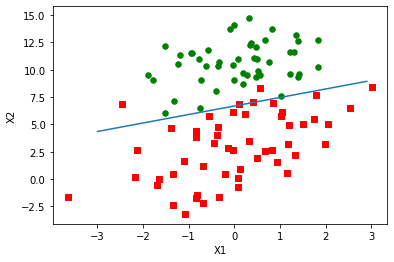

In [167]:
plotBestFit(weights)